### Basic Chains

- indexing_pipeline
- retriever_chain
- document_qa_chain
- router_chain
- llm_requests_chain
- reretrieval_qa_with_sources_chain
- sql_query_chain

To use all of these chains, install the dependencies:

- Chromadb
- HuggingFace


**basic_chains.yaml**

```yaml
embeddings: !SET ${templates.embeddings_huggingface}
vectorstore: !SET ${templates.vectorstore_chroma}
text_splitter: !SET ${templates.text_splitter}

document_loader:
  # default document loader: GenericDocumentLoader, process multiple types of files
  # include: pdf, doc, docx, txt, csv, html, etc.
  initializer: document_loader

text_loader:
  # a typed document loader with specific loader class and its args.
  initializer: typed_document_loader
  data:
    loader_class: langchain_community.document_loaders.TextLoader

indexing_pipeline:
  initializer: indexing_pipeline
  data:
    vectorstore: '{{ vectorstore }}'
    document_loader_chain: '{{ document_loader }}'
    text_splitter: '{{ text_splitter }}'
    # extensions: null  # optional, null by default and will load all supported files

retriever:
  initializer: retriever
  data:
    search_kwargs: {}
    vectorstore: '{{ vectorstore }}'

llm: !SET ${templates.llm_openai_chat}

retrieval_chain:
  initializer: retrieval_chain
  data:
    llm: '{{ llm }}'
    retriever: '{{ retriever }}'

# response the reference sources of the answer
retrieval_with_sourecs_chain:
  initializer: retrieval_qa_with_sources_chain
  data:
    llm: '{{ llm }}'
    retriever: '{{ retriever }}'

document_qa_chain:
  initializer: document_qa_chain
  data:
    llm: '{{ llm }}'
    text_splitter: '{{ text_splitter }}'

router_chain:
  initializer: router_chain
  data:
    llm: '{{ llm }}'
    method: 'json_schema'
    # system_prompt: """  SYSTEM PROMPT  """
    default_members:  # could be overridden with input
      # "animal", "vegetable", "mineral", "other"
      - animal
      - vegetable
      - fruit      
      - other

sql_query_chain:
  initializer: sql_query_chain
  data:
    llm: '{{ llm }}'
    # prompt: '{{ prompt }}'  # optional
    db_uri: 'sqlite:///chinook.db'
    db_engine_args: {}
    db_kwargs: 
      schema: null
      metadata: null
      ignore_tables: null
      include_tables: null
      sample_rows_in_table_info: 0  # default: 3
      indexes_in_table_info: False
      custom_table_info: null
      view_support: false
      max_string_length: 300
      lazy_table_reflection: false
  # Note: specify the prompt here, which could only be used by the sql_query_chain
  prompt:
    initializer: prompt
    data:
      template: 'YOUR PROMPT HERE'
```

In [1]:
import lcstack

lcstack.set_config_root("configs")

lcs = (
    lcstack.LcStackBuilder.from_yaml("basic_chains.yaml")
    .with_env()
    .with_settings(True)
    .build()
)

# or
# lcs = lcstack.LcStack.from_yaml("llm_chain.yaml", env=True, secret=True, settings=True)

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
document_qa_chain = lcs.get("document_qa_chain")

# TODO: install unstructured, or change the file
file = "./README.md.txt"
print(document_qa_chain)
document_qa_chain.invoke({"question": "What is LcStack?", "file_path": file})

bound=RunnableAssign(mapper={
  context: RunnableBinding(bound=RunnableLambda(lambda x: {k: v for k, v in x.items() if k != question_key})
           | RunnableAssign(mapper={
               
             })
           | RunnableLambda(load), kwargs={}, config={'run_name': 'retrieve_documents'}, config_factories=[])
})
| RunnableAssign(mapper={
    answer: RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
              context: RunnableLambda(format_docs)
            }), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
            | ChatPromptTemplate(input_variables=['context', 'question'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.m

{'question': 'What is LcStack?',
 'file_path': './README.md.txt',
 'context': [Document(metadata={'source': './README.md.txt'}, page_content='# LcStack\n\nLcStack is a configuration framework for LLM components, designed to quickly build your own LLM Agent and Workflow in a LowCode manner. Built on [LangChain](https://github.com/langchain-ai/langchain) and [LangGraph](https://github.com/langchain-ai/langgraph), it provides a user-friendly configuration environment and component library to manage the configuration process and Workflow, as well as the ability to integrate with other frameworks.\n\n## Key Features'),
  Document(metadata={'source': './README.md.txt'}, page_content='## Key Features\n\n- Compatible with existing LangChain and LangGraph libraries and frameworks.\n- Includes standard Chains and Agents, with options to add new ones or integrate with other frameworks.\n- Easily set up Agents with essential components like LLM, PromptTemplate, Embedding, etc.\n- Design Workflows 

#### load documents into vectorstore

In [ ]:
indexing_pipeline = lcs.get("indexing_pipeline")

# TODO: install unstructured if it's a .md file, or use a txt file
file = "../README.md.txt"  # file or a directory
extensions = None  # optional, allowed file extensions if it's a directory
print(indexing_pipeline)
indexing_pipeline.invoke({"file_path": file, "extensions": extensions})

#### retrieval chains

In [2]:
# retrieval chain with indexed documents above
retrieval_chain = lcs.get("retrieval_chain")
print(retrieval_chain)
retrieval_chain.invoke({"question": "What is LcStack?"})

c:\Users\bekin\anaconda3\envs\lcstack\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\bekin\anaconda3\envs\lcstack\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
D:\wroks\dev\lcstack\lcstack\components\vectorstores\base.py:13: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `

bound=RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableBinding(bound=RunnableAssign(mapper={
             
           })
           | RunnableLambda(_func), kwargs={}, config={'run_name': 'retrieve_documents'}, config_factories=[])
})
| RunnableAssign(mapper={
    answer: RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
              context: RunnableLambda(format_docs)
            }), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
            | ChatPromptTemplate(input_variables=['context', 'question'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[lan

{'output': 'LcStack refers to a stack-based programming model used in cloud computing environments for managing serverless applications more efficiently. It simplifies function deployment and management without requiring manual scaling of servers.'}

In [3]:
lcs = (
    lcstack.LcStackBuilder.from_yaml("basic_chains.yaml")
    .with_env()
    .with_settings(True)
    .build()
)
router_chain = lcs.get("router_chain")

print(router_chain)
router_chain.invoke({"query": "tell me a joke about dog?"})

bound=RunnableAssign(mapper={
  members: RunnableLambda(lambda x: x.get('members', default_members))
})
| RunnableAssign(mapper={
    members_str: RunnableLambda(lambda x: ', '.join(x['members'][:-1]) + ' or ' + x['members'][-1])
  })
| RunnableLambda(lambda x: route_prompt) kwargs={} config={'name': 'router_chain'} config_factories=[]


{'destination': 'animal'}

In [4]:
# router with runtime members
router_chain.invoke(
    {
        "query": "serach news about Trump?",
        "members": ["Finance", "Politics", "Sociology"],
    }
)

{'destination': 'Politics'}

In [5]:
lcs = (
    lcstack.LcStackBuilder.from_yaml("basic_chains.yaml")
    .with_env()
    .with_settings(True)
    .build()
)
sql_query_chain = lcs.get("sql_query_chain")
print(sql_query_chain)
sql_query_chain.invoke({"question": "how many employees are there?", "top_k": 3})

bound=RunnableBinding(bound=RunnableAssign(mapper={
  input: RunnableLambda(...),
  table_info: RunnableLambda(...)
})
| RunnableLambda(lambda x: {k: v for k, v in x.items() if k not in ('question', 'table_names_to_use')})
| PromptTemplate(input_variables=['input', 'table_info'], input_types={}, partial_variables={'top_k': '5'}, template='You are a SQLite expert. Given an input question, first create a syntactically correct SQLite query to run, then look at the results of the query and return the answer to the input question.\nUnless the user specifies in the question a specific number of examples to obtain, query for at most {top_k} results using the LIMIT clause as per SQLite. You can order the results to return the most informative data in the database.\nNever query for all columns from a table. You must query only the columns that are needed to answer the question. Wrap each column name in double quotes (") to denote them as delimited identifiers.\nPay attention to use only the col

{'output': 'SQLQuery: SELECT COUNT(*) FROM Employees;\nSQLResult: \nCOUNT(*)\n---------\n5'}

### Draw the graph

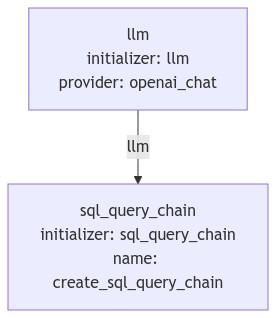

In [6]:
from IPython.display import display, Image

image = lcs.draw_graph_png()
display(Image(image))

### load all configured components and then draw the graph

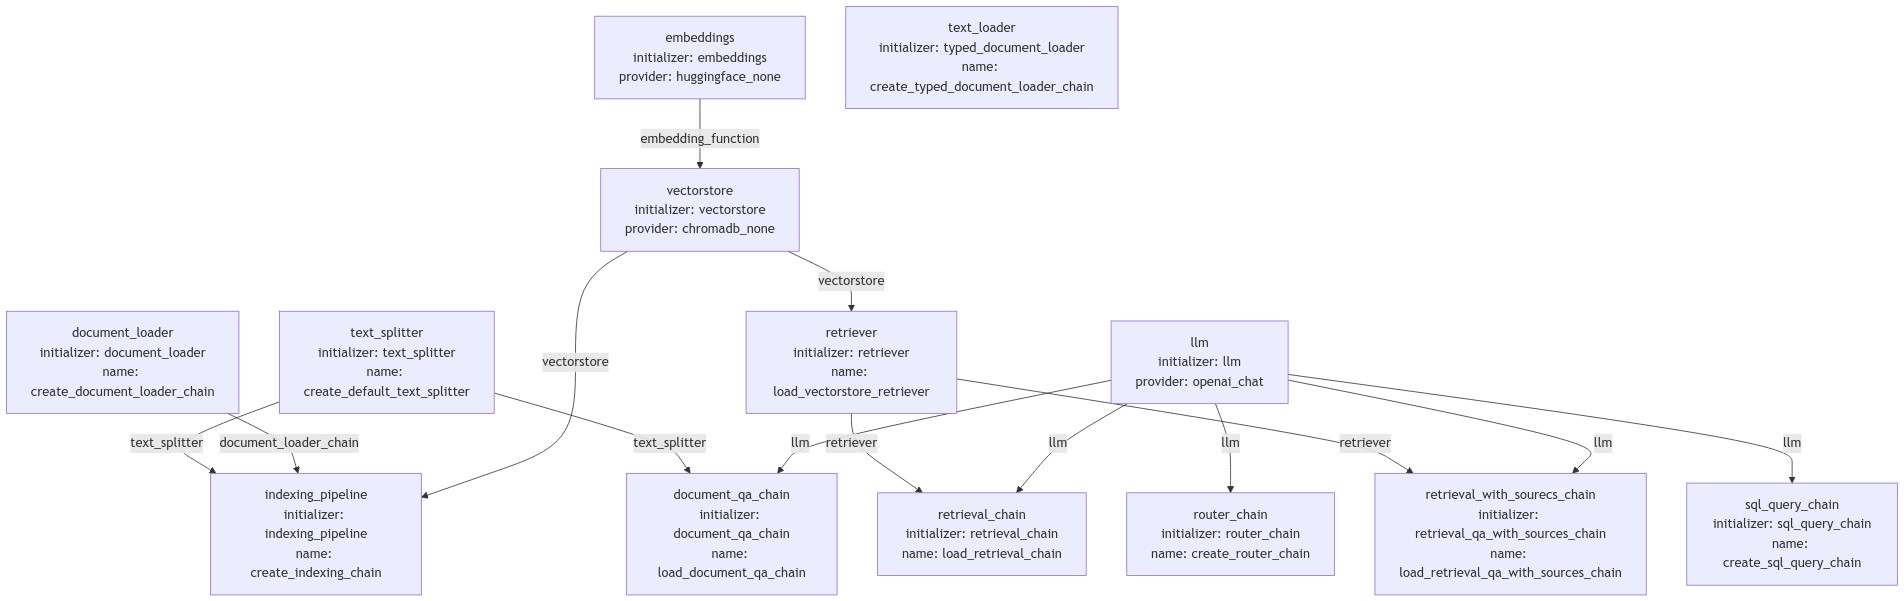

In [7]:
lcs = (
    lcstack.LcStackBuilder.from_yaml("basic_chains.yaml")
    .with_env()
    .with_settings(True)
    .build()
    .prebuild()
)
from IPython.display import display, Image

image = lcs.draw_graph_png()
display(Image(image))